In [76]:
import pandas as pd
import nltk
import string

import matplotlib

%matplotlib inline

In [3]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [6]:
train_data.head(5)

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [7]:
test_data.head(5)

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [20]:
print('authors columns')
print(train_data.author.describe())

count     19579
unique        3
top         EAP
freq       7900
Name: author, dtype: object


In [21]:
print('id columns')
print(train_data.id.describe())
# every id is unique and does not seem to carry any information in out dataset

id columns
count       19579
unique      19579
top       id25071
freq            1
Name: id, dtype: object


In [22]:
print('texts columns')
print(train_data.text.describe())

texts columns
count                                                 19579
unique                                                19579
top       On my way I fell in with an immense populace, ...
freq                                                      1
Name: text, dtype: object


In [25]:
print('longest sting in "text" column: ')
train_data.text.map(len).max()

longest sting in "text" column: 


4663

# Create text corpus 

In [48]:

all_txt = ''

for text in train_data['text']:
    all_txt = all_txt + ' ' + text

# Split into individual words

In [68]:
words = nltk.word_tokenize(all_txt)

# Get rid of punctuation + stop words + empty strings

In [69]:
table = str.maketrans('', '', string.punctuation)
words = [w.translate(table) for w in words]

In [87]:
stop_words = set(nltk.corpus.stopwords.words('english'))

words = [i for i in words if i not in stop_words]
words = [i for i in words if i not in ['I', 'The']]

words = list(filter(None, words))

In [88]:
def plot_freqdist_freq(fd,
                       max_num=None,
                       cumulative=False,
                       title='Frequency plot',
                       linewidth=2):
    
    tmp = fd.copy()
    norm = fd.N()
    
    for key in tmp.keys():
        tmp[key] = float(fd[key]) / norm

    if max_num:
        tmp.plot(max_num, cumulative=cumulative,
                 title=title, linewidth=linewidth)
    else:
        tmp.plot(cumulative=cumulative, 
                 title=title, 
                 linewidth=linewidth)

    return

In [90]:
word_distribution = nltk.FreqDist(words)
word_distribution

FreqDist({'one': 1485, 'upon': 1324, 'could': 1302, 'would': 1239, 'It': 952, 'He': 898, 'man': 729, 'But': 724, 'time': 715, 'said': 703, ...})

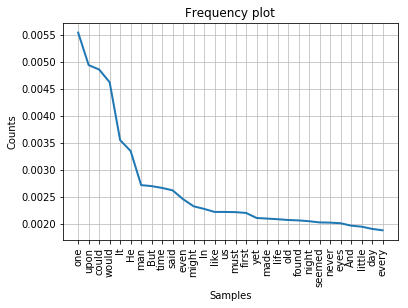

In [92]:
plot_freqdist_freq(word_distribution, max_num=30)

In [93]:
# number of unique words
len(word_distribution)

27360